# Modelo de clasificación con KNN
## Autora: Sandra Alonso Paz, estudiante del Máster en Biología Computacional.

In [420]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

# Importación de los datos
### 1. Importar los datos del CSV

In [421]:
path ='dataset18.csv'
data = pd.read_csv(path)

### 2. Creamos las dos variables que utilizaremos en el modelo
   
    X = Atributos del modelo (columnas del CSV)
    
    Y = Columna target (la que queremos predecir a partir del resto de columnas)

In [422]:
X = data.iloc[:,2:23] #Seleccionamos todas las columnas quitando la columna Unnamed (id de la fila ) y la columna Target.
Y = []

# Como la columna target esta compuesta por valores categóricos ordinales (R y NR) convertimos en valores numéricos (R=0, NR=1) 
for i in range (len(data)):
    if data.Target[i]=='R':
        Y.append(0)
    else:
        Y.append(1)



# Creación del modelo de KNN
### 1. Separamos el conjunto de datos en entrenamiento y prueba

In [423]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.30, random_state=125)

print('Tamaño del conjunto de entrenamiento:', len(XTrain))
print('Tamaño de la columna objetivo del conjunto de entrenamiento:', len(yTrain))
print('Tamaño del conjunto de prueba:', len(XTest))
print('Tamaño de la columna objetivo del conjunto de prueba:', len(yTest))

Tamaño del conjunto de entrenamiento: 37
Tamaño de la columna objetivo del conjunto de entrenamiento: 37
Tamaño del conjunto de prueba: 16
Tamaño de la columna objetivo del conjunto de prueba: 16


En este modelo no utilizo el GridSearchCV porque me interesa estudiar individualmente los principales parámetros del modelo KNN (K, Métrica de distancia)
### 2. Estudio de la mejor K

In [424]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 6 and is: 0.7500


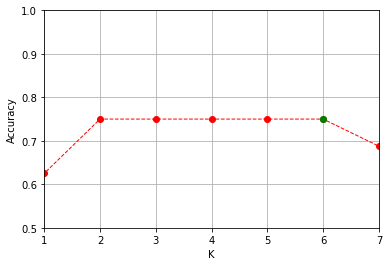

In [425]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# El punto verde indica la mejor K
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 3. Estudio de la mejor métrica (euclídea o manhattan)

In [426]:
from sklearn import neighbors
# Creación del modelo con distancia euclidea
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

#Creación del modelo con distancia Manhattan
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x0000024CF4443DC0>,
                     n_neighbors=6)

In [427]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,0,1,1
1,0,0,0
2,0,0,0
3,1,1,1
4,0,0,1


# Cross Validation
### 1. Modelo con distancia euclidea

In [428]:
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Mejor resultado de la cross validation del modelo con mejores resultados: " +str(np.mean(result1)))
print("Mejor resultado de la cross validation del modelo con mejores resultados: " +str(np.mean(result2)))


Mejor resultado de la cross validation del modelo con mejores resultados: 0.8071428571428572
Mejor resultado de la cross validation del modelo con mejores resultados: 0.7857142857142858


# Predicciones y estudio de resultados

In [429]:
# Realizamos las predicciones con el modelo óptimo sobre el conjunto de datos de entrenamiento
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0

# Comparamos con la columna Target y comprobamos cuantos aciertos ha habido
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [430]:
# Realizamos las predicciones con el modelo óptimo sobre el conjunto de datos de entrenamiento
yhatTrain2 = euclid_model.predict(XTrain)
contTrain2 = 0

# Comparamos con la columna Target y comprobamos cuantos aciertos ha habido
for i in range(0,len(yTrain),1) :
    if (yhatTrain2[i] == yTrain[i]):
        contTrain2 = contTrain2 + 1

In [431]:
# Realizamos las predicciones con el modelo óptimo sobre el conjunto de datos de prueba
mayhatTest = manhattan_model.predict(XTest)
contTest = 0

# Comparamos con la columna Target y comprobamos cuantos aciertos ha habido
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [432]:
# Realizamos las predicciones con el modelo óptimo sobre el conjunto de datos de prueba
euyhatTest2 = euclid_model.predict(XTest)
contTest2 = 0

# Comparamos con la columna Target y comprobamos cuantos aciertos ha habido
for i in range(0,len(yTest),1) :
    if (euyhatTest2[i] == yTest[i]):
        contTest2 = contTest2 + 1

In [433]:
print('Precisión final en el conjunto de datos de entrenamiento (manhattan): ' + str(contTrain/len(yTrain)))
print('Precisión final en el conjunto de datos de entrenamiento (euclidea): ' + str(contTrain2/len(yTrain)))

print('Precisión final en el conjunto de datos de prueba (manhattan): ' + str(contTest/len(yTest)))
print('Precisión final en el conjunto de datos de prueba (euclidea): ' + str(contTest2/len(yTest)))

Precisión final en el conjunto de datos de entrenamiento (manhattan): 0.8378378378378378
Precisión final en el conjunto de datos de entrenamiento (euclidea): 0.8648648648648649
Precisión final en el conjunto de datos de prueba (manhattan): 0.8125
Precisión final en el conjunto de datos de prueba (euclidea): 0.75


# Matriz de confusión
### 1. Matriz de confusión del conjunto de datos del entrenamiento 
#### 1.1. Modelo Manhattan


In [434]:
from sklearn.metrics import classification_report,confusion_matrix
print('----------------Matriz de confusión (Entrenamiento-Manhattan)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Datos de entrada:  ' + str(np.array(yTrain)))
print('Predicción:        ' +str(yhatTrain))

----------------Matriz de confusión (Entrenamiento-Manhattan)------------------
[[15  3]
 [ 3 16]]
Datos de entrada:  [0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1]
Predicción:        [0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1]


Estos resultados pueden ser interpretados de la siguiente manera:
1. 15 verdaderos positivos (Verdaderamente responderán al tratamiento)
2. 16 verdaderos negativos (Verdaderamente no responderán al tratamiento)
3. 3 falsos positivos (Fueron clasificados como mala respuesta al tratamiento, sin embargo, no responderán correctamente al mismo)
4. 3 falsos negativos (Fueron clasificados como buena respuesta al tratamiento, sin embargo, no responderán  al tratamiento)

### 1.2. Resultados obtenidos del conjunto de entrenamiento Manhattan

In [435]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.84      0.84      0.84        19

    accuracy                           0.84        37
   macro avg       0.84      0.84      0.84        37
weighted avg       0.84      0.84      0.84        37



#### 1.3. Modelo Euclidea


In [436]:
from sklearn.metrics import classification_report,confusion_matrix
print('----------------Matriz de confusión (Entrenamiento-Euclidea)------------------')
print(confusion_matrix(yTrain,yhatTrain2))
print('Datos de entrada:  ' + str(np.array(yTrain)))
print('Predicción:        ' +str(yhatTrain))

----------------Matriz de confusión (Entrenamiento-Euclidea)------------------
[[14  4]
 [ 1 18]]
Datos de entrada:  [0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1]
Predicción:        [0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1]


### 1.2. Resultados obtenidos del conjunto de entrenamiento Euclidea

In [437]:
print(classification_report(yTrain,yhatTrain2))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.82      0.95      0.88        19

    accuracy                           0.86        37
   macro avg       0.88      0.86      0.86        37
weighted avg       0.87      0.86      0.86        37



### 3. Matriz de confusión del conjunto de datos de prueba
#### 3.1. Distancia euclidea

In [438]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, euyhatTest2)
print('----------------Matriz de confusión (Prueba)------------------')
print(confusion_matrix)
print('Datos de entrada:  ' + str(np.array(yTest)))
print('Predicción:        ' +str(euyhatTest2))

----------------Matriz de confusión (Prueba)------------------
[[8 4]
 [0 4]]
Datos de entrada:  [0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0]
Predicción:        [1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0]


Estos resultados pueden ser interpretados de la siguiente manera:
1. 8 verdaderos positivos (Verdaderamente responderán al tratamiento)
2. 4 verdaderos negativos (Verdaderamente no responderán al tratamiento)
3. 4 falsos positivos (Fueron clasificados como mala respuesta al tratamiento, sin embargo, responderán correctamente al mismo)
4. 0 falsos negativos (Fueron clasificados como buena respuesta al tratamiento, sin embargo, no responderán al tratamiento)

In [439]:
print(classification_report(yTest, euyhatTest2))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.50      1.00      0.67         4

    accuracy                           0.75        16
   macro avg       0.75      0.83      0.73        16
weighted avg       0.88      0.75      0.77        16



#### 3.2. Distancia Manhattan

In [440]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Matriz de confusión (Prueba)------------------')
print(confusion_matrix)
print('Datos de entrada:  ' + str(np.array(yTest)))
print('Predicción:        ' +str(mayhatTest))

----------------Matriz de confusión (Prueba)------------------
[[10  2]
 [ 1  3]]
Datos de entrada:  [0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0]
Predicción:        [1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0]


Estos resultados pueden ser interpretados de la siguiente manera:
1. 10 verdaderos positivos (Verdaderamente responderán al tratamiento)
2. 3 verdaderos negativos (Verdaderamente no responderán al tratamiento)
3. 2 falsos positivos (Fueron clasificados como mala respuesta al tratamiento, sin embargo, responderán correctamente al mismo)
4. 1 falsos negativos (Fueron clasificados como buena respuesta al tratamiento, sin embargo, no responderán  al tratamiento)

In [441]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.60      0.75      0.67         4

    accuracy                           0.81        16
   macro avg       0.75      0.79      0.77        16
weighted avg       0.83      0.81      0.82        16



# Bibliografía
https://moodle.upm.es/titulaciones/oficiales/pluginfile.php/10054660/mod_resource/content/4/Unit2.1-SupervisedLearning-Classification-KNN.pdf

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier

https://github.com/jakemath/knn-sklearn/blob/master/knn.ipynb

https://github.com/SandraAlonso/PRACTICA-IC3